In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import monsoon_plot as pf

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
path = '/Users/johannemehren/filer/'

era5 = xr.open_dataset(path + 'era5_newgrid_newsize.nc')

erai = xr.open_dataset(path + 'erai_newgrid_newsize.nc')

In [4]:
erai_s = erai.sel(time=slice('2007-01-01', '2018-12-31'), lat=slice(50, -10), lon=slice(40,120))
era5_s = era5.sel(lat=slice(50, -10), lon=slice(40,120))

era5_r_monsoon = era5_s.groupby('time.season').mean()
erai_r_monsoon = erai_s.groupby('time.season').mean()


In [5]:
lrt_diff = era5_r_monsoon.tpt[1,:,:] - erai_r_monsoon.tpt[1,:,:]
cpt_diff = era5_r_monsoon.ctpt[1,:,:] - erai_r_monsoon.ctpt[1,:,:]

lrt_diff_p = era5_r_monsoon.tpp[1,:,:] - erai_r_monsoon.tpp[1,:,:]
cpt_diff_p = era5_r_monsoon.ctpp[1,:,:] - erai_r_monsoon.ctpp[1,:,:]

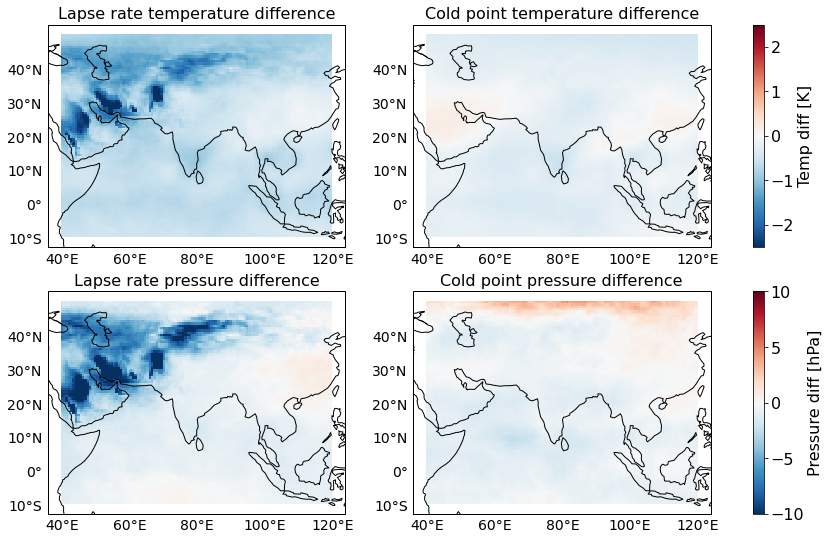

In [45]:
tl1 = 'Lapse rate temperature difference'
tl2 = 'Cold point temperature difference'
tl3 = 'Lapse rate pressure difference'
tl4 = 'Cold point pressure difference'

h = pf.fourplot_two_cb(lrt_diff, cpt_diff,lrt_diff_p, cpt_diff_p,
                      tl1 = tl1,tl2 = tl2, tl3 = tl3,  tl4 = tl4,
                      vmin1=-2.5, vmax1 = 2.5, vmin2 = -10, vmax2 = 10, 
                      label1='Temp diff [K]', label2='Pressure diff [hPa]')